In [54]:
import ast

import cf_xarray
import cftime

import numpy as np
import xarray as xr
import xesmf as xe
from distributed import Client
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [138]:
ds = xr.open_mfdataset('/home/z5113258/Documents/data/thetao_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_201001-201412.nc', parallel=True)

In [127]:
da = ds.thetao

In [128]:
da

<xarray.DataArray 'thetao' (time: 60, lev: 50, i: 292, j: 362)>
dask.array<open_dataset-e347b801b65cae4484431293ec8ab520thetao, shape=(60, 50, 292, 362), dtype=float32, chunksize=(60, 50, 292, 362), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 2010-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lev        (lev) float64 0.5126 1.621 2.858 ... 5.1e+03 5.498e+03 5.904e+03
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 284 285 286 287 288 289 290 291
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 354 355 356 357 358 359 360 361
    latitude   (i, j) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude  (i, j) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    comment:        Diagnostic should be contributed even for models using co...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello

In [129]:
obs = xr.open_dataset('/home/z5113258/Documents/GODAS/pottmp/pottmp.1980.nc')

In [130]:
obs_r = xr.open_dataset('/home/z5113258/Documents/GODAS/remapbil_1/pottmp/pottmp.1980.nc')

Text(0, 0.5, 'lat')

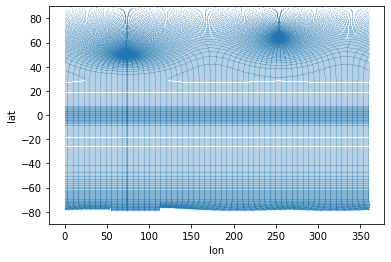

In [131]:
plt.scatter(ds["longitude"], ds["latitude"], s=0.01)  # plot grid locations
plt.ylim([-90, 90])
plt.xlabel("lon")
plt.ylabel("lat")

In [139]:
ds = ds.rename({"j": "lon", "i": "lat"})

In [140]:
ds

<xarray.Dataset>
Dimensions:             (time: 60, bnds: 2, lev: 50, lat: 292, lon: 362, vertices: 4)
Coordinates:
  * time                (time) object 2010-01-16 12:00:00 ... 2014-12-16 12:0...
  * lev                 (lev) float64 0.5126 1.621 2.858 ... 5.498e+03 5.904e+03
  * lat                 (lat) int32 0 1 2 3 4 5 6 ... 286 287 288 289 290 291
  * lon                 (lon) int32 0 1 2 3 4 5 6 ... 356 357 358 359 360 361
    latitude            (lat, lon) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude           (lat, lon) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(60, 2), meta=np.ndarray>
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(50, 2), meta=np.ndarray>
    vertices_latitude   (lat, lon, vertices) float64 dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
    vertices_longitude  (lat, lon, vertices) float64 dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
    thetao              (time, lev, lat, lon) float32 dask.array<chunksize=(60, 50, 292, 362), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            thetao
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/26cbe4a3-186e-4c9b-9fee-f39af4db4000

In [148]:
ds_out = xe.util.grid_2d(-180.0, 180.0, 1, -90.0, 90.0, 1)

In [149]:
ds_out

<xarray.Dataset>
Dimensions:  (y: 180, x: 360, y_b: 181, x_b: 361)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) float64 -180.0 -179.0 -178.0 ... 178.0 179.0 180.0
    lat_b    (y_b, x_b) float64 -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0 90.0
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    *empty*

In [151]:
regridder = xe.Regridder(ds, ds_out, "bilinear")

/home/z5113258/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


In [152]:
dr_out = regridder(da)

/home/z5113258/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:599: UserWarning: Using dimensions ('i', 'j') from data variable thetao as the horizontal dimensions for the regridding.
  UserWarning,


In [153]:
dr_out

<xarray.DataArray (time: 60, lev: 50, y: 180, x: 360)>
dask.array<_regrid, shape=(60, 50, 180, 360), dtype=float32, chunksize=(60, 50, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2010-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lev      (lev) float64 0.5126 1.621 2.858 ... 5.1e+03 5.498e+03 5.904e+03
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

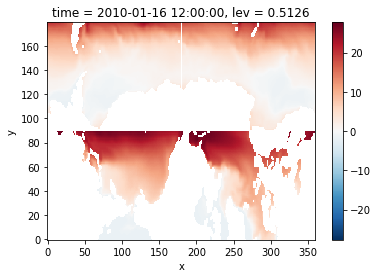

In [154]:
dr_out[0,0].plot()

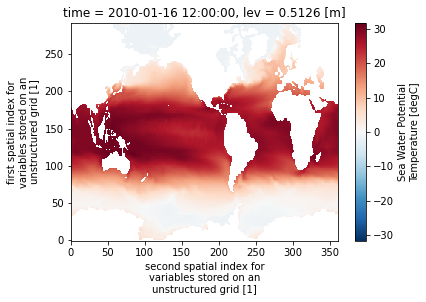

In [112]:
da[0,0].plot()

In [159]:
da2 = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6_HB/CMCC-ESM2/CMCC-ESM2_temp_tendency.nc')

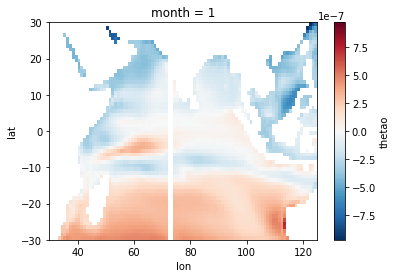

In [163]:
ds2.thetao[0].plot()